In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import  seaborn as sns


In [6]:
import pymysql
con = pymysql.connect(host = 'localhost', user = 'root', passwd = 'HajiasiFbabA1*', db ='mental_health')

In [7]:
mh1 = pd.read_sql_query('select * from students', con)

C:\Users\hajia\AppData\Local\Temp\ipykernel_15192\1791517792.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  mh1 = pd.read_sql_query('select * from students', con)


In [11]:
pd.set_option('display.max_columns',None)
mh1.isnull().sum().to_frame().T

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [2]:
import pandas as pd

In [15]:
students_by_region = pd.read_sql_query("""select if(inter_dom = 'inter', region, 'Local hai bhai') as student_type, count(if(inter_dom = 'inter', region, 'Local hai bhai')) as num_of_students from students group by if(inter_dom = 'inter', region, 'Local hai bhai')""", con)

C:\Users\hajia\AppData\Local\Temp\ipykernel_15192\236051413.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  students_by_region = pd.read_sql_query("""select if(inter_dom = 'inter', region, 'Local hai bhai') as student_type, count(if(inter_dom = 'inter', region, 'Local hai bhai')) as num_of_students from students group by if(inter_dom = 'inter', region, 'Local hai bhai')""", con)


In [8]:
mh1.replace({'':np.nan}, inplace = True)

In [16]:
mh1.isnull().sum().to_frame().T

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0,0,0,0,0,0


In [19]:
mh1['inter_dom'].value_counts()

Inter    201
Dom       67
Name: inter_dom, dtype: int64

In [21]:
mh1[mh1['inter_dom']== 'Inter']

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,5,High,NaN,Yes,No,No,No,0,Min,34,23,9,11,8,11,2,27,91,5,5,6,3,2,1,4,1,3,4,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,4,High,NaN,No,No,No,No,2,Min,48,8,7,5,4,3,2,10,39,7,7,7,4,4,4,4,1,1,1,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,4,High,Yes,Yes,No,No,No,2,Min,41,13,4,7,6,4,3,14,51,3,3,3,1,1,2,1,1,1,1,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,3,Average,No,No,No,No,No,3,Min,37,16,10,10,8,6,4,21,75,5,5,5,5,5,2,2,2,4,4,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,3,Average,Yes,No,No,No,No,3,Min,37,15,12,5,8,7,4,31,82,5,5,5,2,5,2,5,5,4,4,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Inter,SEA,Male,Under,21,3,3,Medium,4,High,4,High,Yes,Yes,No,No,No,6,Mild,37,23,8,11,8,6,4,22,82,3,2,2,2,4,2,4,2,6,4,4,No,No,No,No,No,No,No,No,Yes,No,No
197,Inter,SEA,Female,Under,20,2,1,Short,2,Low,4,High,Yes,No,No,No,No,7,Mild,16,29,18,17,17,12,8,44,145,7,1,3,3,4,4,4,4,7,1,4,Yes,No,No,No,No,No,No,No,Yes,No,No
198,Inter,SEA,Female,Under,21,3,3,Medium,2,Low,5,High,Yes,No,No,Yes,Major,16,ModSev,25,24,11,17,4,11,6,37,110,5,7,3,1,6,1,6,1,4,1,3,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No
199,Inter,SEA,Female,Under,18,1,1,Short,1,Low,4,High,No,No,No,No,No,8,Mild,38,11,12,10,4,7,4,20,68,5,5,4,3,3,3,3,3,5,5,5,Yes,Yes,No,No,No,No,No,No,Yes,Yes,Yes


In [22]:
mh1[mh1['inter_dom']=='Dom']

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
201,Dom,JAP,Female,Grad,27,5,2,Medium,3,Average,3,Average,Yes,Yes,No,Yes,Major,12,Mod,47,16,11,5,8,7,3,31,81,7,3,7,1,6,6,1,5,4,1,NaN,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,No
202,Dom,JAP,Female,Under,18,1,1,Short,5,High,3,Average,No,No,No,No,No,9,Mild,48,9,4,5,4,3,2,10,37,4,4,4,4,1,1,1,1,1,1,4,No,No,No,No,No,No,No,No,No,No,No
203,Dom,JAP,Female,Under,21,3,3,Medium,5,High,3,Average,Yes,No,No,No,No,7,Mild,40,16,8,10,8,6,4,20,72,6,6,7,1,1,1,5,1,1,1,4,Yes,Yes,Yes,No,No,No,Yes,No,No,No,No
204,Dom,JAP,Male,Under,20,2,3,Medium,5,High,1,Low,No,No,No,No,No,3,Min,47,11,4,5,4,5,2,12,43,1,5,5,3,1,1,3,1,1,1,3,No,Yes,Yes,No,No,No,No,No,No,No,No
205,Dom,JAP,Female,Under,21,3,3,Medium,5,High,1,Low,No,No,Yes,Yes,Other,10,Mod,48,8,4,5,4,3,2,10,36,7,5,7,1,1,1,1,1,1,1,1,Yes,Yes,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21,3,4,Long,5,High,4,High,No,Yes,No,No,No,8,Mild,27,16,9,10,8,7,4,20,74,1,7,5,1,3,3,3,1,1,1,6,No,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22,3,3,Medium,3,Average,4,High,Yes,Yes,No,No,No,2,Min,48,8,10,5,4,3,4,16,50,7,7,7,7,2,2,2,2,2,1,3,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19,2,1,Short,5,High,3,Average,No,No,No,No,No,9,Mild,47,8,7,5,5,3,2,13,43,5,7,7,6,7,7,7,1,1,1,2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19,2,1,Short,5,High,3,Average,No,No,No,No,No,1,Min,43,8,12,5,4,3,2,10,44,7,5,7,5,5,5,5,4,4,4,2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


In [23]:
mh1[mh1['inter_dom'].isnull()]

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi


<Axes: xlabel='student_type'>

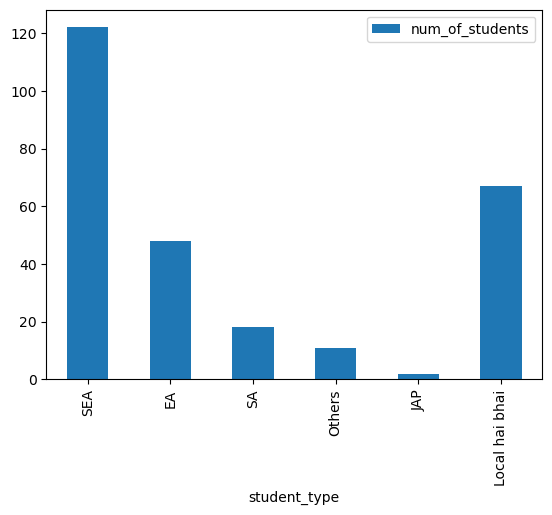

In [20]:
students_by_region.plot(kind = 'bar',x ='student_type', y = 'num_of_students')

In [21]:
students_mental_health_by_region = pd.read_sql_query("""select inter_dom, round(avg(todep),2) as avg_todep, min(todep) as min_todep, max(todep)as max_todep,
round(avg(toas),2) as avg_toas, min(toas) as min_toas, max(toas) as max_toas,
round(avg(tosc),2) as avg_tosc, min(tosc) as min_tosc, max(tosc) as max_tosc from students
group by inter_dom ;
""", con)

C:\Users\hajia\AppData\Local\Temp\ipykernel_15192\4282640126.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  students_mental_health_by_region = pd.read_sql_query("""select inter_dom, round(avg(todep),2) as avg_todep, min(todep) as min_todep, max(todep)as max_todep,


In [23]:
students_mental_health_by_region

,inter_dom,avg_todep,min_todep,max_todep,avg_toas,min_toas,max_toas,avg_tosc,min_tosc,max_tosc
0,Inter,8.04,0,25,75.56,36,145,37.42,11,48
1,Dom,8.61,0,23,62.84,36,112,37.64,8,48


<Axes: >

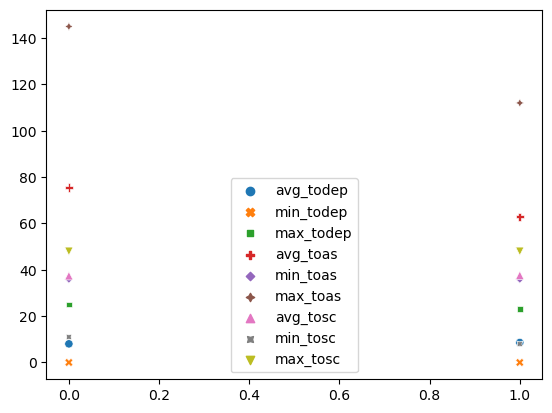

In [28]:
sns.scatterplot(students_mental_health_by_region)

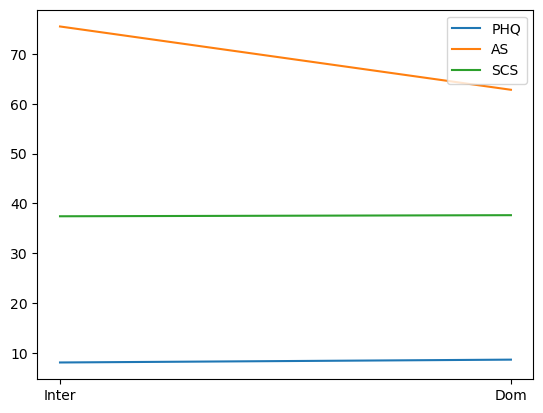

In [37]:
plt.plot(students_mental_health_by_region['inter_dom'], students_mental_health_by_region['avg_todep'], label = 'PHQ')
plt.plot(students_mental_health_by_region['inter_dom'], students_mental_health_by_region['avg_toas'], label = 'AS')
plt.plot(students_mental_health_by_region['inter_dom'], students_mental_health_by_region['avg_tosc'], label = 'SCS')
plt.legend()

In [46]:
mh_by_age = mh1[['age_cate', 'todep', 'toas', 'tosc']].groupby('age_cate').mean()

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,...,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,...,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,...,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,...,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,...,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21,3,4,Long,5,High,...,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22,3,3,Medium,3,Average,...,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19,2,1,Short,5,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19,2,1,Short,5,High,...,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


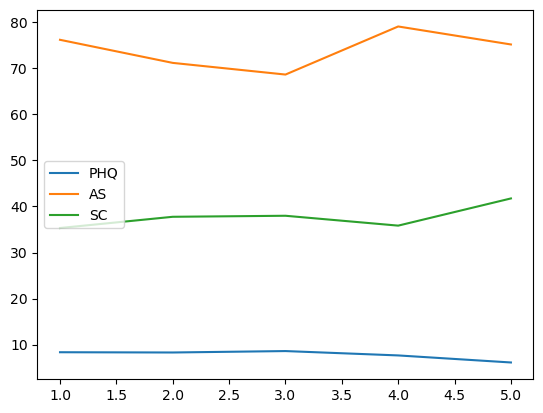

In [49]:
plt.plot(mh_by_age.index, mh_by_age['todep'], label = 'PHQ')
plt.plot(mh_by_age.index, mh_by_age['toas'], label = 'AS')
plt.plot(mh_by_age.index, mh_by_age['tosc'], label ='SC')
plt.legend()
plt.show()

In [52]:
mh_by_stay = mh1[['stay', 'todep', 'toas', 'tosc']].groupby('stay').mean()

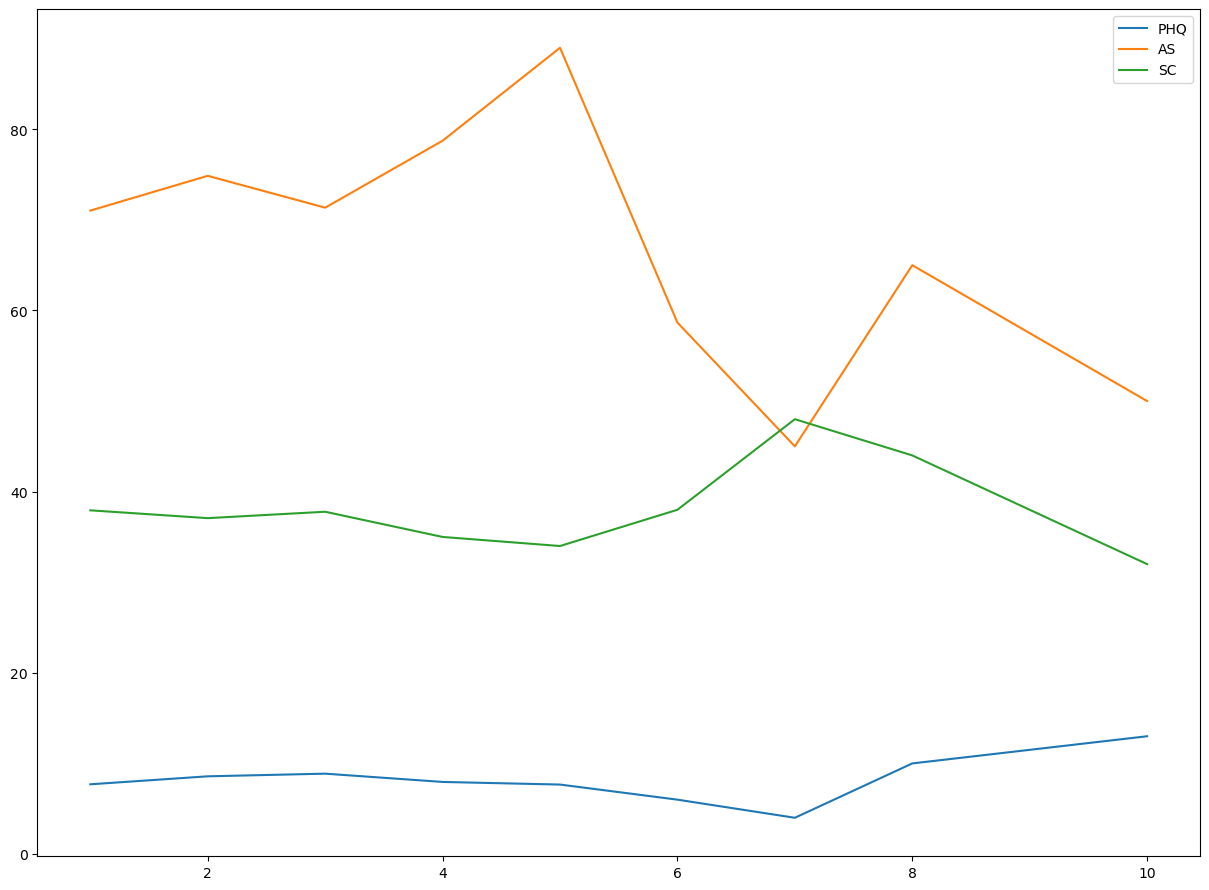

In [55]:
plt.figure(figsize=[15,11])
plt.plot(mh_by_stay.index, mh_by_stay['todep'], label = 'PHQ')
plt.plot(mh_by_stay.index, mh_by_stay['toas'], label = 'AS')
plt.plot(mh_by_stay.index, mh_by_stay['tosc'], label ='SC')
plt.legend()
plt.show()

In [56]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [58]:
import plotly.express as px
import plotly.graph_objects as go
continuous_variables = ['age', 'stay', 'japanese', 'english', 'todep', 'tosc', 'apd', 'ahome', 'aph', 'afear', 'acs', 'aguilt', 'amiscell', 'toas', 'partner', 'friends', 'parents', 'relative', 'profess', 'phone', 'doctor', 'reli', 'alone', 'others', 'internet']

# Create a subset dataframe only the columns of the continous variables
data_cont = mh1[continuous_variables]

# Create a pearson correlation
data_corr = data_cont.corr(method='pearson')

# Build the Heatmap
fig = go.Figure(go.Heatmap(x=data_corr.columns, y=data_corr.columns, z=data_corr.values.tolist(), zmin=-1, zmax=1))
                
# Adjust the plot size
fig.update_layout(width=800, height=800)

# Show the plot
fig.show()

C:\Users\hajia\AppData\Local\Temp\ipykernel_15192\2701905130.py:9: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [63]:
#Histogram
pd.set_option('display.max_columns',None)
mh1

,inter_dom,region,gender,academic,age,age_cate,stay,stay_cate,japanese,japanese_cate,english,english_cate,intimate,religion,suicide,dep,deptype,todep,depsev,tosc,apd,ahome,aph,afear,acs,aguilt,amiscell,toas,partner,friends,parents,relative,profess,phone,doctor,reli,alone,others,internet,partner_bi,friends_bi,parents_bi,relative_bi,professional_bi,phone_bi,doctor_bi,religion_bi,alone_bi,others_bi,internet_bi
0,Inter,SEA,Male,Grad,24,4,5,Long,3,Average,5,High,NaN,Yes,No,No,No,0,Min,34,23,9,11,8,11,2,27,91,5,5,6,3,2,1,4,1,3,4,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
1,Inter,SEA,Male,Grad,28,5,1,Short,4,High,4,High,NaN,No,No,No,No,2,Min,48,8,7,5,4,3,2,10,39,7,7,7,4,4,4,4,1,1,1,NaN,Yes,Yes,Yes,No,No,No,No,No,No,No,No
2,Inter,SEA,Male,Grad,25,4,6,Long,4,High,4,High,Yes,Yes,No,No,No,2,Min,41,13,4,7,6,4,3,14,51,3,3,3,1,1,2,1,1,1,1,NaN,No,No,No,No,No,No,No,No,No,No,No
3,Inter,EA,Female,Grad,29,5,1,Short,2,Low,3,Average,No,No,No,No,No,3,Min,37,16,10,10,8,6,4,21,75,5,5,5,5,5,2,2,2,4,4,NaN,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,No
4,Inter,EA,Female,Grad,28,5,1,Short,1,Low,3,Average,Yes,No,No,No,No,3,Min,37,15,12,5,8,7,4,31,82,5,5,5,2,5,2,5,5,4,4,NaN,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,Dom,JAP,Female,Under,21,3,4,Long,5,High,4,High,No,Yes,No,No,No,8,Mild,27,16,9,10,8,7,4,20,74,1,7,5,1,3,3,3,1,1,1,6,No,Yes,Yes,No,No,No,No,No,No,No,Yes
264,Dom,JAP,Female,Under,22,3,3,Medium,3,Average,4,High,Yes,Yes,No,No,No,2,Min,48,8,10,5,4,3,4,16,50,7,7,7,7,2,2,2,2,2,1,3,Yes,Yes,Yes,Yes,No,No,No,No,No,No,No
265,Dom,JAP,Female,Under,19,2,1,Short,5,High,3,Average,No,No,No,No,No,9,Mild,47,8,7,5,5,3,2,13,43,5,7,7,6,7,7,7,1,1,1,2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No
266,Dom,JAP,Male,Under,19,2,1,Short,5,High,3,Average,No,No,No,No,No,1,Min,43,8,12,5,4,3,2,10,44,7,5,7,5,5,5,5,4,4,4,2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,No


In [74]:
mh_by_stay_cate = mh1[['stay_cate','gender', 'todep', 'toas', 'tosc']].groupby(['stay_cate','gender']).mean()

In [96]:
mh_by_inter = mh1[['inter_dom','age', 'todep', 'toas', 'tosc']].groupby(['inter_dom','age']).mean()

In [101]:
mh_by_inter

todep       toas       tosc  age inter_dom
inter_dom age                                                
Dom       18    8.333333  64.333333  38.444444   18       Dom
          19    8.900000  67.100000  36.600000   19       Dom
          20    9.470588  62.411765  37.235294   20       Dom
          21    8.666667  58.888889  37.722222   21       Dom
          22    5.428571  53.571429  39.714286   22       Dom
          23    9.000000  79.000000  34.250000   23       Dom
          24   10.000000  67.000000  36.000000   24       Dom
          27   12.000000  81.000000  47.000000   27       Dom
Inter     17    4.666667  70.666667  37.333333   17     Inter
          18    8.750000  80.607143  34.107143   18     Inter
          19    8.439024  74.097561  37.902439   19     Inter
          20    7.352941  73.264706  38.205882   20     Inter
          21    9.230769  75.230769  37.743590   21     Inter
          22    8.357143  70.428571  38.142857   22     Inter
          23    9.666667  81.250000  32.000000   23     Inter
          24    4.666667  74.333333  42.333333   24     Inter
          25    6.111111  80.777778  37.333333   25     Inter
          27   10.000000  42.000000  35.000000   27     Inter
          28    3.333333  71.000000  39.000000   28     Inter
          29    3.750000  63.500000  43.000000   29     Inter
          30    9.333333  97.333333  41.000000   30     Inter
          31    5.750000  80.250000  43.500000   31     Inter

In [100]:
mh_by_inter['age'] = list(mh_by_inter.index.get_level_values('age'))
mh_by_inter['inter_dom'] = list(mh_by_inter.index.get_level_values('inter_dom'))

In [88]:
mh_by_stay_cate['gender'] = list(mh_by_stay_cate.index.get_level_values('gender'))

In [90]:
mh_by_stay_cate['stay_cate'] = list(mh_by_stay_cate.index.get_level_values('stay_cate'))

In [95]:
fig = px.bar(mh_by_stay_cate, mh_by_stay_cate['stay_cate'],'todep', width = 1000, height= 1000, color='gender',
             title = 'Analysis by Stay category', labels = {'stay_cate':'Category of stay','todep':'PHQ_score'})

fig.show()


In [103]:
mh_by_inter

todep       toas       tosc  age inter_dom
inter_dom age                                                
Dom       18    8.333333  64.333333  38.444444   18       Dom
          19    8.900000  67.100000  36.600000   19       Dom
          20    9.470588  62.411765  37.235294   20       Dom
          21    8.666667  58.888889  37.722222   21       Dom
          22    5.428571  53.571429  39.714286   22       Dom
          23    9.000000  79.000000  34.250000   23       Dom
          24   10.000000  67.000000  36.000000   24       Dom
          27   12.000000  81.000000  47.000000   27       Dom
Inter     17    4.666667  70.666667  37.333333   17     Inter
          18    8.750000  80.607143  34.107143   18     Inter
          19    8.439024  74.097561  37.902439   19     Inter
          20    7.352941  73.264706  38.205882   20     Inter
          21    9.230769  75.230769  37.743590   21     Inter
          22    8.357143  70.428571  38.142857   22     Inter
          23    9.666667  81.250000  32.000000   23     Inter
          24    4.666667  74.333333  42.333333   24     Inter
          25    6.111111  80.777778  37.333333   25     Inter
          27   10.000000  42.000000  35.000000   27     Inter
          28    3.333333  71.000000  39.000000   28     Inter
          29    3.750000  63.500000  43.000000   29     Inter
          30    9.333333  97.333333  41.000000   30     Inter
          31    5.750000  80.250000  43.500000   31     Inter

In [105]:
fig = px.bar(mh_by_inter,'age','todep', width = 1000, height= 1000, color='inter_dom',
             title = 'Analysis by type of student', labels = {'age':'Age of the student','todep':'PHQ_score'})

fig.show()
